In [182]:
import pandas as pd
import seaborn as sns

In [38]:
data = pd.read_csv("uber-raw-data-apr14.csv")

In [39]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [40]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [41]:
data.set_index('Date/Time')

,Lat,Lon,Base
Date/Time,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512
2014-04-01 00:17:00,40.7267,-74.0345,B02512
2014-04-01 00:21:00,40.7316,-73.9873,B02512
2014-04-01 00:28:00,40.7588,-73.9776,B02512
2014-04-01 00:33:00,40.7594,-73.9722,B02512
...,...,...,...
2014-04-30 23:22:00,40.7640,-73.9744,B02764
2014-04-30 23:26:00,40.7629,-73.9672,B02764
2014-04-30 23:31:00,40.7443,-73.9889,B02764


In [44]:
data.reset_index()

,index,Date/Time,Lat,Lon,Base
0,0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,4,2014-04-01 00:33:00,40.7594,-73.9722,B02512
...,...,...,...,...,...
564511,564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764


In [50]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].agg(get_dom)
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [54]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].agg(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].agg(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


Text(0.5, 1.0, 'Frequency by DOM - uber - apr 2014')

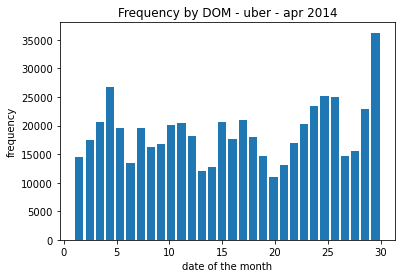

In [71]:
import matplotlib.pyplot as plt
#data.hist?
data.hist('dom', grid=False, bins=30, rwidth=0.8)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by DOM - uber - apr 2014')

In [88]:
#for k, rows in data.groupby('dom'):
    #print(k, len(rows))
    #print(k, rows)
    #break
    
by_date = data.groupby('dom')['weekday'].count()
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
Name: weekday, dtype: int64

<AxesSubplot:xlabel='dom'>

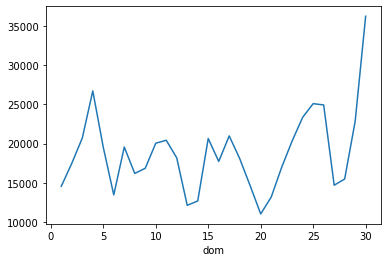

In [91]:
by_date.plot(kind='line')

<AxesSubplot:xlabel='dom'>

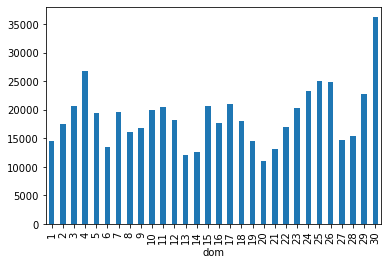

In [127]:
by_date.plot(kind='bar')

In [128]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
Name: weekday, dtype: int64

In [129]:
type(by_date_sorted)

pandas.core.series.Series

<AxesSubplot:xlabel='dom'>

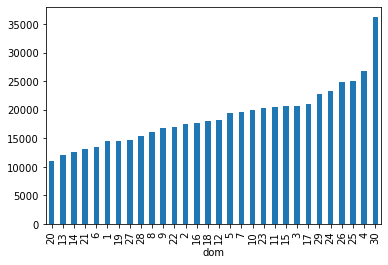

In [150]:
by_date_sorted.plot(kind='bar')

array([[<AxesSubplot:title={'center':'hour'}>]], dtype=object)

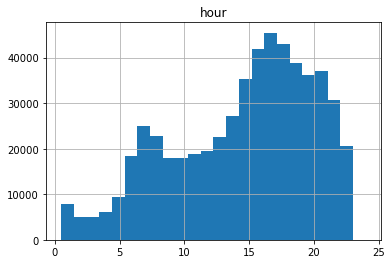

In [155]:
data.hist('hour', bins=24, range=(.5,24))

NameError: name 'xticks' is not defined

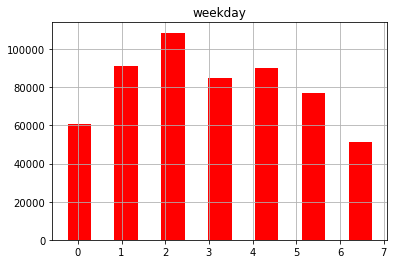

In [171]:
data.hist('weekday', bins=7, range=(-.5, 7), rwidth=0.5, color='red')

In [191]:
by_cross = data.groupby(['weekday', 'hour'])['Date/Time'].count().unstack()
type(by_cross)
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


<AxesSubplot:xlabel='hour', ylabel='weekday'>

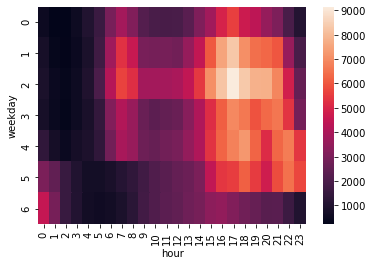

In [183]:
sns.heatmap(by_cross)